<a href="https://colab.research.google.com/github/ariesabdillah/homework_k-means_cluster/blob/main/homework_k_means_cluster_aries_abdillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Transformasi Data

In [56]:
df_transform = df.drop(columns =['Genre', 'Age','CustomerID' ]).values
print(df_transform)


[[ 15  39   4]
 [ 15  81   3]
 [ 16   6   4]
 [ 16  77   3]
 [ 17  40   4]
 [ 17  76   3]
 [ 18   6   4]
 [ 18  94   3]
 [ 19   3   4]
 [ 19  72   3]
 [ 19  14   4]
 [ 19  99   3]
 [ 20  15   4]
 [ 20  77   3]
 [ 20  13   4]
 [ 20  79   3]
 [ 21  35   4]
 [ 21  66   3]
 [ 23  29   4]
 [ 23  98   3]
 [ 24  35   4]
 [ 24  73   3]
 [ 25   5   4]
 [ 25  73   3]
 [ 28  14   4]
 [ 28  82   3]
 [ 28  32   4]
 [ 28  61   3]
 [ 29  31   4]
 [ 29  87   3]
 [ 30   4   4]
 [ 30  73   3]
 [ 33   4   4]
 [ 33  92   3]
 [ 33  14   4]
 [ 33  81   3]
 [ 34  17   4]
 [ 34  73   3]
 [ 37  26   4]
 [ 37  75   3]
 [ 38  35   4]
 [ 38  92   3]
 [ 39  36   4]
 [ 39  61   0]
 [ 39  28   4]
 [ 39  65   3]
 [ 40  55   0]
 [ 40  47   0]
 [ 40  42   0]
 [ 40  42   0]
 [ 42  52   0]
 [ 42  60   0]
 [ 43  54   0]
 [ 43  60   0]
 [ 43  45   0]
 [ 43  41   0]
 [ 44  50   0]
 [ 44  46   0]
 [ 46  51   0]
 [ 46  46   0]
 [ 46  56   0]
 [ 46  55   0]
 [ 47  52   0]
 [ 47  59   0]
 [ 48  51   0]
 [ 48  59   0]
 [ 48  50 

## Recrtuitment

In [6]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Membuat Graph Scatterplot

<AxesSubplot:xlabel='Income', ylabel='Spending'>

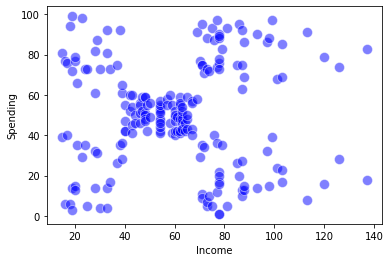

In [9]:
sns.scatterplot(x="Income", y="Spending", data= df, s=100, color="blue", alpha = 0.5)

## Mencari jumlah cluster menggunakan elbow method

In [57]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(df_transform)
    elbow.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


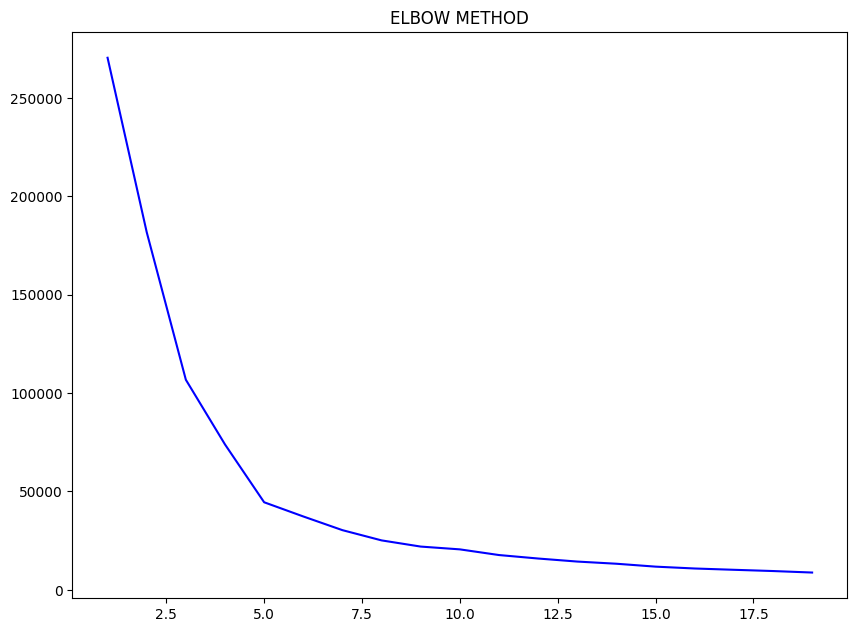

In [58]:
import seaborn as sns
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

dari grafik diatas dapat dilihat bahwa grafik mulai mendatar ketika mancapai jumlah klaster 5, sehingga dapat digunakan 5 sebagai jumlah kluster

## Klaster dengan jumlah klaster 5

In [ ]:
Melakukan kluster dengan jumlah kluster 5

In [59]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(df_transform)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
print(df)

     CustomerID   Genre  Age  Income  Spending  klaster
0             1    Male   19      15        39        4
1             2    Male   21      15        81        3
2             3  Female   20      16         6        4
3             4  Female   23      16        77        3
4             5  Female   31      17        40        4
..          ...     ...  ...     ...       ...      ...
195         196  Female   35     120        79        2
196         197  Female   45     126        28        1
197         198    Male   32     126        74        2
198         199    Male   32     137        18        1
199         200    Male   30     137        83        2

[200 rows x 6 columns]


## Visualisasi data setelah dikelompokkan

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

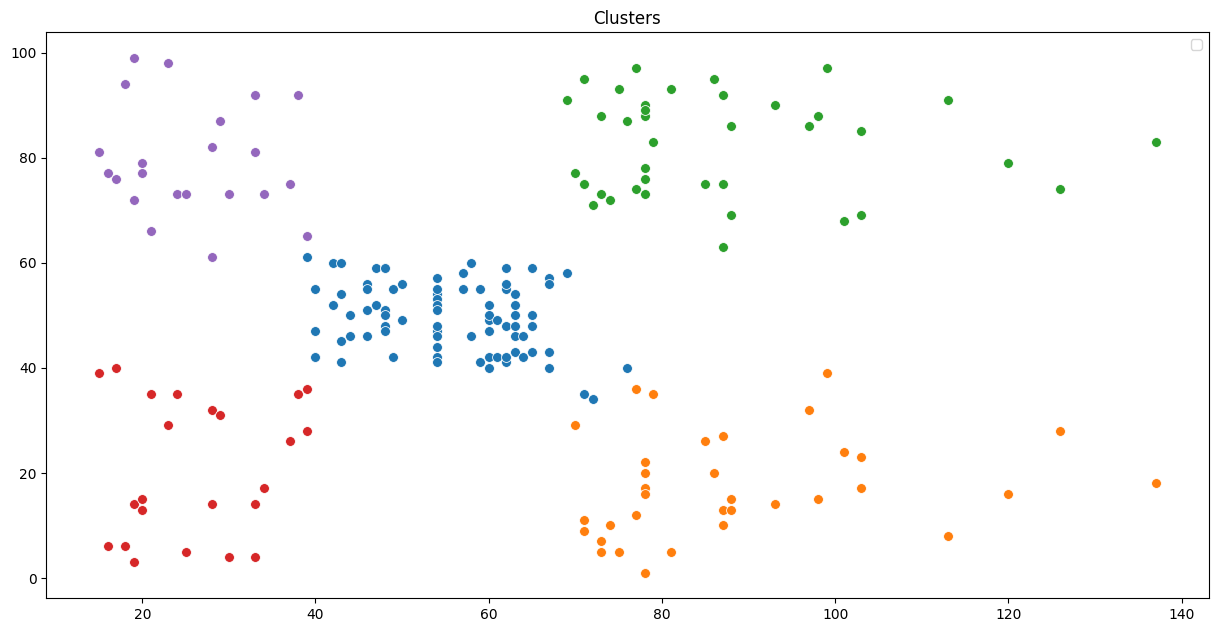

In [61]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(df_transform[y_pred == 0, 0], df_transform[y_pred == 0, 1],s=50)
sns.scatterplot(df_transform[y_pred == 1, 0], df_transform[y_pred == 1, 1],s=50)
sns.scatterplot(df_transform[y_pred == 2, 0], df_transform[y_pred == 2, 1],s=50)
sns.scatterplot(df_transform[y_pred == 3, 0], df_transform[y_pred == 3, 1],s=50)
sns.scatterplot(df_transform[y_pred == 4, 0], df_transform[y_pred == 4, 1],s=50)
plt.title('Clusters')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

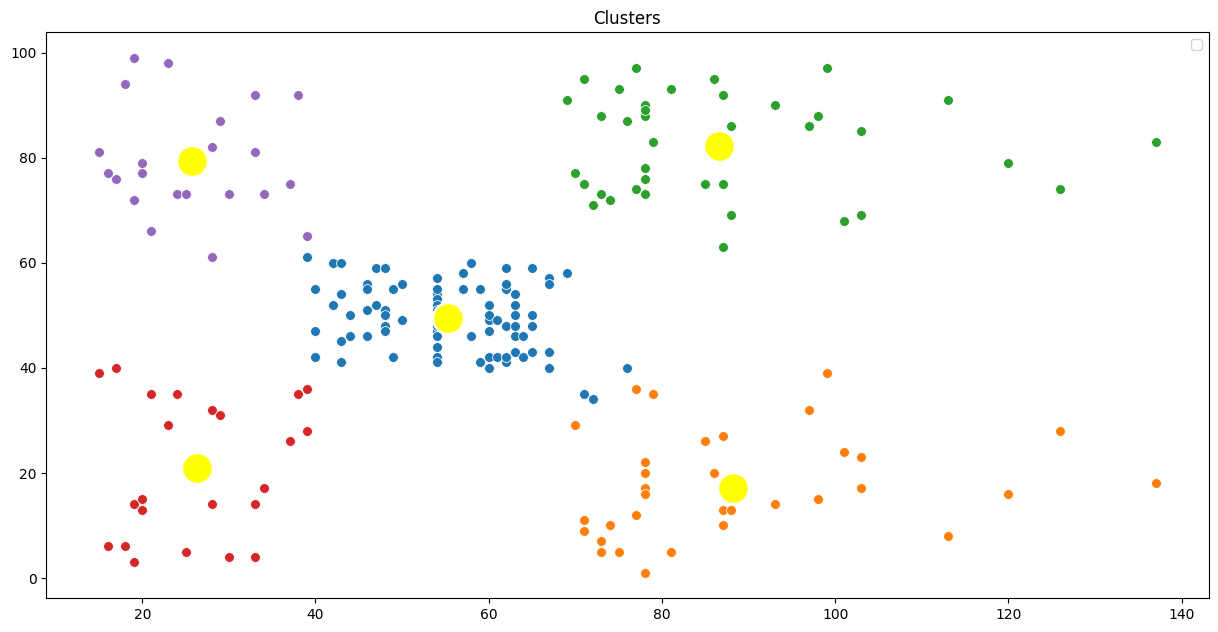

In [62]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(df_transform[y_pred == 0, 0], df_transform[y_pred == 0, 1],s=50)
sns.scatterplot(df_transform[y_pred == 1, 0], df_transform[y_pred == 1, 1],s=50)
sns.scatterplot(df_transform[y_pred == 2, 0], df_transform[y_pred == 2, 1],s=50)
sns.scatterplot(df_transform[y_pred == 3, 0], df_transform[y_pred == 3, 1],s=50)
sns.scatterplot(df_transform[y_pred == 4, 0], df_transform[y_pred == 4, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()

dari grafik diatas dapat disimpulkan bahwa terdapat 5 jumlah klaster, yaitu klaster 0 diwarnai dengan warna merah menandakan bahwa memiliki spending dan income yang rendah. klaster 1 berwarna orange menandakan memiliki income tinggi, tetapi spending yang rendah. klaster 2 diwarnai dengan warna biru menandakan memiliki spending dan income berada diantara rendah dan tinggi.  klaster 4 diwarnai dengan warna ungu menandakan memiliki income rendah, tetapi spending yang tinggi. klaster 4 diwarnai dengan warna hijau menandakan memiliki income dan spending yang tinggi